## Цель работы 

Получить практические навыки работы по решению задачи первичного анализа «сырых» данных, подготовки массива к обработке, выявления и описания зависимостей в исходных данных с использованием языка программирования.

## Ход работы
Ознакомиться с методическими материалами и примерами выполнения команд.
Последовательно выполнить следующие шаги применительно к выборке данных, согласно варианту задания:

1. Работа с данными 

  1. Получить \*.csv-файл с исходными данными согласно варианту. С помощью текстового редактора определить наличие заголовка и знак-разделитель столбца

  2. С помощью библиотеки pandas создать таблицу (объект Dataframe) на основе \*.csv-файла с исходными данными

  3. Провести первичный анализ всех данных. Получить размер исходный таблицы

  4. Определить наличие пропусков и выбрать способ их обработки. Получить размер таблицы после обработки пропусков 

  5. Определить наличие и привести нужные для работы признаки к числовому типу

  6. Сохранить в виде файла текущее состояние обработанной таблицы (Dataframe)


2. Выбор и обработка признаков

  1. Проверить взаимозависимость всех числовых признаков на основе матрицы корреляции

  2. Выбрать целевую переменную 'y' и независимые признаки 'x1, x2, x3, ...', оказывающие на нее влияние (целевая - 1 шт., признаки>=2 шт.) 

  3. Исключить выбросы

  4. Сформировать обучающую и проверочную части выборки


10. Построить линейные регрессионные модели для каждого выбранной комбинации признаков :
  - m1: от единственного ЕДИНСТВЕННОЙ переменной (x1) на НЕ стандартизированных  данных
  - m2: от множества НАБОРА#1 переменных (пример: x1, x2, x3) на НЕ стандартизированных данных
  - m3: от множества НАБОРА#2 переменных (пример: x5, x6, x7) на НЕ стандартизированных данных

11. Выполнить анализ полученных моделей:

  1. Получить коэффициенты линейной регрессии y(x) = K*x + B

  2. Получить оценку точности R2(коэфф. детерминации) и RMSE (среднеквадратичное отклонение)

  3. Нанести график прямой y(x) = K*x + B поверх точечной диаграммы (выбранный признак, целевая переменная)
  
  4. Построить диаграмму рассеяния вычисленных значений Y_pred от проверочных значений Y_test
  
  5. Построить гистограмму остатков (разностей между Y_pred и Y_test)
  
12. \* В качестве доп. задания предлагается расширить множество формируемых моделей.

## Содержание отчета
<font color='red'>Название отчета должно быть в формате:
<br>АВТ-9xx_ЛР-xx_Фамилия1_Фамилия2
</font>


1. Результаты первичного анализа исходных данных
  1. Количество записей и признаков
  2. Смысловое описание признаков
  3. Типы данных столбцов и информация о пропусках
  4. Результат замены категориальных или ранговых данных на числовые
  5. Результат обработки пропущенных значений

2. Обоснование выбора целевой переменной и признаков для анализа
  1. Перечень вариантов целевых переменных, исходя из п. 1.2.
  2. Матрица коэффициентов корреляции
  3. Матрица смежности (графический вариант интерпретации взаимосвязей переменных)
  4. Информация о целевом значении и признаках на него влияющих 
  5. Результат отчистки выбранных признаков исходного массива от выбросов

3. Результаты анализа полученных регрессионных линейных моделей (m11,m12,m21,m22)
  1. Уравнение линейной регрессии вида y(x_i, ...) =  K_i*x_i + ... + B 
  2. Оценка точности R2 и RMSE
  3. График полученной линейной зависимости y(x) = K*x + B поверх точечной диаграммы (y: выбранный признак, x: целевая переменная)
  4. Построить диаграмму рассеяния вычисленных значений Y_pred от проверочных значений Y_test
  5. Гистограмму остатков (разностей между Y_pred и Y_test)
  

4. Выводы по результатам сравнительного анализа полученных регрессионных моделей 

# Работа с данными

## Подключение библиотек

Перед началом работы убедитесь, что необходимые для работы пакеты установлены в системе. Для установки отсутствующих используйте команду:
- pip install numpy pandas sklearn seaborn matplotlib
- pip install jupyterlab

Назначение библиотек:
* numpy - обработка многомерных массивов, линейная алгебра, преобразование Фурье, случайные числа
* pandas - обработка (загрузка, сохранение, анализа) данных 
* seaborn - визуализация данных (на базе matplotlib)
* sklearn - (классификация, регрессия, кластеризация...)
* scipy - пакет для выполнения научных и инженерных расчётов.

In [1]:
# Python 3.8
import pandas as pd
import numpy  as np

from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns

## Загрузка входных данных

Данные "Melbourne Housing Snapshot" содержат информацию о продажах недвижимости в г. Мельбурн (Австралия)
- Suburb: название окрестности, пригорода
- Rooms: Кол-во комнат
- Price: Цена
- Method - способ продажи:
  - S - property sold; SP - property sold prior;
  - PI - property passed in; PN - sold prior not disclosed;
  - SN - sold not disclosed; NB - no bid;
  - VB - vendor bid; W - withdrawn prior to auction;
  - SA - sold after auction; SS - sold after auction price not disclosed.
  - N/A - price or highest bid not available.
- Type - тип недвижимости:
  - br - bedroom(s);
  - h - house,cottage,villa, semi,terrace; 
  - u - unit, duplex; 
  - t - townhouse;
  - dev site - development site;
  - o res - other residential.
- SellerG: Агент по недвижимости, совершивший сделку
- Date: Дата продажи
- Distance: Расстояние до центрального делового района CBD (central business district)
- Regionname: Район, название
- Propertycount: Number of properties that exist in the suburb.
- Bedroom2 : Кол-во спален
- Bathroom: Кол-во ванных
- Car: Кол-во парковочных мест
- Landsize: Размер участка
- BuildingArea: Площадь
- CouncilArea: Управляющая компания

Для загрузки табличных данных из файла применятся функция .read_csv() с указанием параметров (путь, кодировка, разделитель, обработка колонок с заголовками или датой...)

<b> Путь вида "../datasets/melbourne_data.csv" подразумевает следующее расположение файлов:
```
WorkDir/
├─ datasets/
│  └─ melbourne_data.csv
│ 
├─ lab.1,2/
│  └─ 1,2. ЛР-1,2.ipynb
```
</b> 


In [2]:
df = pd.read_csv('./melbourne_data.csv', # путь к файлу, (используй автодотолнение)
                   sep=',', # разделитель данных в файле
                 
                   #  header= {None|Целочисленное} номер строки с заголовками, нумерация с нуля
                   header=0,       #если заголовки в нулевой строке таблицы
                   #  header=None  #если заголовки отсутствуют

                   # na_values =  ['???', ' '], # доп. символы для обозначения отсутствующих значений
)

df[:2] # отобразить первые строки таблицы df 

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0


Переменная __df__ является экземпляром класса __DataFrame__ библиотеки __pandas__.

"DataFrame" - двумерный массив с изменяемым размером  набором полезных функций, каждый столбец которого является экземпляром класса "Series".

| Series | Series | Series | Series |
|--------|--------|--------|--------|
| int | string | float | bool |
| int | string | float | bool |
| int | string | float | bool |

Смысловая интерпретация:
 - каждая строка - объект, сделка по продаже
 - каждый столбец - признак, который описывает характеристику объекта(сделки)

|   | Признак_0 | Признак_1 | Признак_2 |
|--------|--------|--------|--------|
| Объект_0 | string | float | bool |
| Объект_1 | string | float | bool |
| Объект_2 | string | float | bool |

Осмотрим полученную таблицу и убедимся, что данные загружены корректно

In [3]:
df [0:3] # Квадратные скобки позволяют получить срез исходной таблицы DataFrame[начало:конец]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


## Осмотр данных / Первичный анализ

### Размер таблицы

Свойство __DataFrame.shape__ возвращает два значения соответствующей таблице - [кол-во строк, кол-во столбов]

In [4]:
print  (df.shape)
nrow = df.shape[0]
ncol = df.shape[1]
print ("Итого: " + str(nrow) + " записи, " + str(ncol) + " столбец (признак).")

(13580, 21)
Итого: 13580 записи, 21 столбец (признак).


### Признаки

Метод __describe()__ выводит основные статистически  данных по каждому числовому признаку (типы int64 и float64): 
* count - число непропущенных значений, 
* mean - среднее арифметическое 
* std - стандартное отклонение (среднеквадратическое), 
* min, max - минимальное и максимальное значение 
* 0.25, 0.50, 0.75 квартили.
* unique - кол-во уникальных значения
* top - самое часто встречающееся значение
* freq - кол-во значений 'top'


In [5]:
df.describe() # описание для числовых значений

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


### Названия признаков

Получим список всех столбцов, при помощи свойства __DataFrame.columns__

In [6]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

В случае, если названия столбцов отсутствуют, либо требуется их изменить, то полю data.columns следует присвоить новый список(list) из строк.

In [7]:
colNamesList = ['Suburb',
                'Address',
                'Rooms',
                'Type',
                'Price',
                'Method',
                'SellerG',
                'Date',
                'Distance',
                'Postcode',
                'Bedroom2',
                'Bathroom',
                'Car',
                'Landsize',
                'BuildingArea',
                'YearBuilt',
                'CouncilArea',
                'Lattitude',
                'Longtitude',
                'Regionname',
                'Propertycount']

df.columns = (  colNamesList )

## Пропущенные значения

Осмотрим значения последних пяти объектов, обратим внимание на значения __NaN__ в столбцах __'BuildingArea'__ и __'CouncilArea'__  - особые значение для заполнения отсутствующих в источнике.

In [8]:
df[-3:]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


У объекта DataFrame присутствует функция isna(), которая формирует соответствующую __таблицу-маску__ совпадающую по размеру с исходной, но каждое значение __маски__ - логический индикатор True|False

In [9]:
df.isna()[-3:]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13577,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
13578,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
13579,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


Над таблицей __таблицей-маской__ допустимо выполнить агрегирующую функцию __.sum()__ , при этом каждое значение TRUE будет приведено к единицы и в результате мы получим количество пропущенных элементов по каждому признаку. 

In [10]:
df.isna().sum() 

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

Для понимания как распределены отсутствующие значения в исходной таблице, попробуем получить графическое изображение __таблицы-маски__

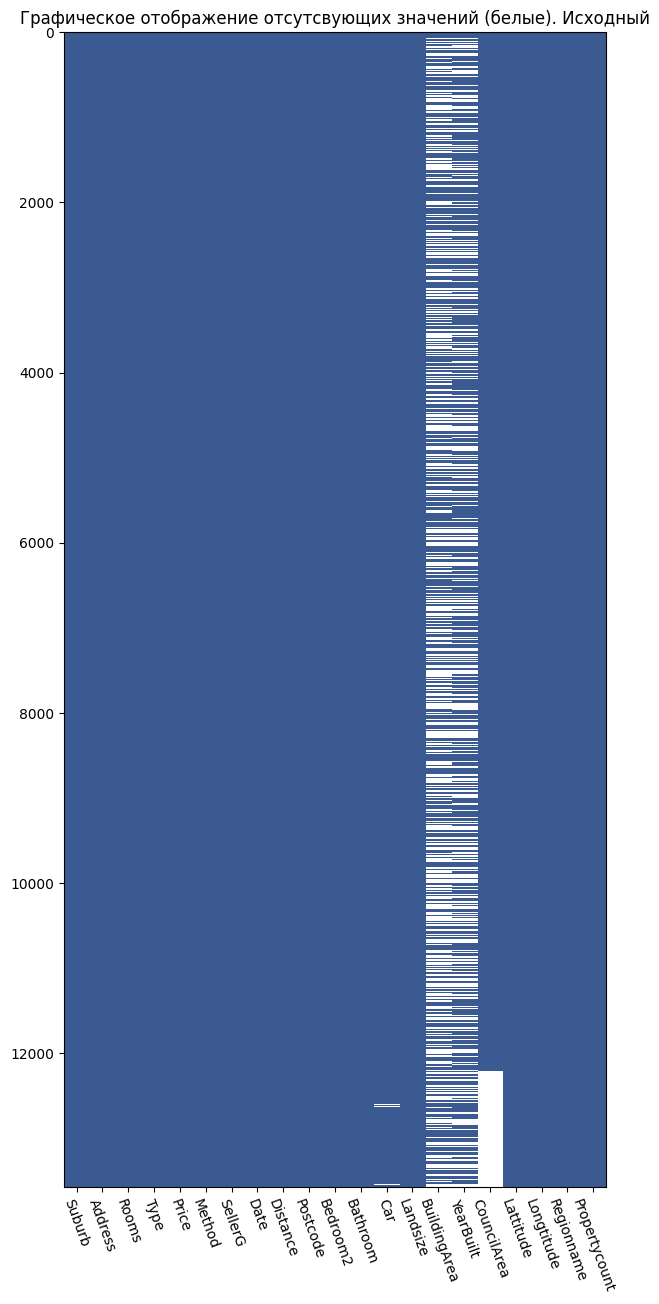

In [11]:
from matplotlib.colors import ListedColormap
def plotTableNA(dataF, addToTilte =""):
    '''  Функция для построения графика отображение отсутсвующих значений'''
    if   len(dataF.columns)> 20:   K = 3
    elif len(dataF.columns)== 1:   K = 1
    else:                          K = 1.7 
        
    figSizeH = 15        # размер полотна, высота
    figSizeW =int(len(dataF.columns)/K) # размер полотна, ширина
    fig, ax = plt.subplots( figsize=(figSizeW, figSizeH))

    # отрисовать матрицу значений функцией imshow. Применяется цветовая палитра 
    plt.imshow( dataF.isna(),
                cmap = ListedColormap([ '#3B5A92', 'white', ]), #cm.get_cmap('jet'),
                aspect='auto',  # ‘auto’ | ‘equal’ | scalar]
                interpolation= 'none',)
    ax.set_xticks(np.arange(len(dataF.columns)))
    ax.set_xticklabels(dataF.columns, rotation=-70,)
    plt.title("Графическое отображение отсутсвующих значений (белые). "+ addToTilte)

# Вызов функции с указанием параметров
plotTableNA( df, "Исходный")

Перед дальнейшими действиями следует обработать пропущенные значения. Варианты обработки:
- Вар.1. заполнить "особыми" значениями, которые невозможно встретить в выборке (прим.: "#NA")
- Вар.2. заполнить вычисленными значениями, рассчитанными на основе имеющихся значений признака (средние, мин., макс., и т.д.)
- Вар.3. исключить строки или столбцы:
  - Вар.3.1. исключить строки, в которых присутствуют пропущенные значения
  - Вар.3.2. исключить столбцы, в которых присутствуют пропущенные значения 

In [12]:
print("Размер исходного DataFrame", df.shape)
print("Вар.3.1. Размер при исключении по строкам", df.dropna(axis='index', how='any').shape)
print("Вар.3.2. Размер при исключении по столбцам", df.dropna(axis='columns', how='any').shape)

Размер исходного DataFrame (13580, 21)
Вар.3.1. Размер при исключении по строкам (6196, 21)
Вар.3.2. Размер при исключении по столбцам (13580, 17)


Несмотря на существенное кол-во пропущенных значений в признаках "BuildingArea" и "YearBuilt", названные признаки предположительно информативны, поэтому примем решение их сохранить, а следовательно выбрать режим исключения __"Вар.3.1."__ 

In [13]:
# axis='index' - удаление строк
# axis='columns' - удаление столбцов
df = df.dropna(axis='index', how='any')
print("Размер таблицы после исключения пропусков", df.shape)

Размер таблицы после исключения пропусков (6196, 21)


Необходимо убедится в том, ожидаемый результат совпадает с фактическим.

In [14]:
df.isna().sum() 

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

## Приведение признаков к числовыми

На текущем этапе в таблице присутствуют столбцы с категориальными значениями (тип данных object), которые необходимо преобразовать к числовым значениям (тип данных int, float).

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6196 entries, 1 to 12212
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6196 non-null   object 
 1   Address        6196 non-null   object 
 2   Rooms          6196 non-null   int64  
 3   Type           6196 non-null   object 
 4   Price          6196 non-null   float64
 5   Method         6196 non-null   object 
 6   SellerG        6196 non-null   object 
 7   Date           6196 non-null   object 
 8   Distance       6196 non-null   float64
 9   Postcode       6196 non-null   float64
 10  Bedroom2       6196 non-null   float64
 11  Bathroom       6196 non-null   float64
 12  Car            6196 non-null   float64
 13  Landsize       6196 non-null   float64
 14  BuildingArea   6196 non-null   float64
 15  YearBuilt      6196 non-null   float64
 16  CouncilArea    6196 non-null   object 
 17  Lattitude      6196 non-null   float64
 18  Longtit

В нашем случае категориальными признаками являются названия, символьные обозначения типа недвижимости и пр.

Для преобразования числовым значениям только те признаки, количество уникальных значений не превышает 8 (строка unique).

In [16]:
df.describe(include=['object', 'bool'])  # описание для не числовых значений

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,6196,6196,6196,6196,6196,6196,6196,6196
unique,287,6117,3,5,203,51,31,8
top,Reservoir,36 Aberfeldie St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,154,3,4088,3957,763,225,658,2166


Метоп __pd.get_dummies__ формирует новую таблицу (DataFrame), в которой будут добавлены столбцы по количеству уникальных значений категориального признака.

При этом только в одной группе столбцов соответствующих исходному признаку будет присутствовать единственное значение "1" как признак принадлежности.

In [17]:
objColNames = ['Type', 'Regionname'] # названия признаков в исходной таблицы
prefixColNames =  ['Type', 'RegN']   # сокращенные названия признаков для новой таблицы

df_dummies = pd.get_dummies(
    df[objColNames],       # названия признаков в исходной 
    prefix=prefixColNames  # сокращенные названия в новой
)
df_dummies[:3]

,Type_h,Type_t,Type_u,RegN_Eastern Metropolitan,RegN_Eastern Victoria,RegN_Northern Metropolitan,RegN_Northern Victoria,RegN_South-Eastern Metropolitan,RegN_Southern Metropolitan,RegN_Western Metropolitan,RegN_Western Victoria
1,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0


## Формирование таблицы с строго числовыми значениями

Полученную таблицу __df_dummies__ объединим с строго числовыми столбцами исходной таблицы. Для этого перечислим названия числовых признаков и используем метод pd.concat()

In [18]:
# список названий числовых признаков исходной таблицы
digitColName = [
    'Rooms'       ,
    'Price'       ,
    'Distance'    ,
    'Postcode'    ,
    'Bedroom2'    ,
    'Bathroom'    ,
    'Car'         ,
    'Landsize'    ,
    'BuildingArea',
    'YearBuilt'   ,
    'Lattitude'   ,
    'Longtitude'  ,
    'Propertycount']


# объединить выбранные столбцы из исходной таблицы df  с  столбцами созданной таблицы df_dummies
df_digPlus  = pd.concat(
                        [
                          df[digitColName],   
                          df_dummies     
                        ], # список объединяемых объектов

                        axis='columns' # способ объединения - по столбцам 
)
df_digPlus[:3]

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Type_t,Type_u,RegN_Eastern Metropolitan,RegN_Eastern Victoria,RegN_Northern Metropolitan,RegN_Northern Victoria,RegN_South-Eastern Metropolitan,RegN_Southern Metropolitan,RegN_Western Metropolitan,RegN_Western Victoria
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,...,0,0,0,0,1,0,0,0,0,0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,...,0,0,0,0,1,0,0,0,0,0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,...,0,0,0,0,1,0,0,0,0,0


# Выбор целевого значения и признаков для анализа данных

<font color='red'> Все последующие действия производятся над таблицей <b>df_digPlus </b></font>


## Корреляция

* __Коэффициент корреляции r-Пирсона__
  
  Мера линейной взаимосвязи переменных, при нелинейной взаимосвязи непоказателен. Не устойчив к выбросам в выборке. Учитывает числовые значения. Переменные должны иметь нормальное распределение. Изменяется в пределах от -1 до +1.

![Drag Racing](https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Correlation_examples.png/400px-Correlation_examples.png)

In [19]:
corr_df = df_digPlus.corr(method='pearson')
corr_df["Price"]

Rooms                              0.533505
Price                              1.000000
Distance                          -0.148867
Postcode                           0.125539
Bedroom2                           0.514561
Bathroom                           0.503922
Car                                0.261507
Landsize                           0.081419
BuildingArea                       0.530574
YearBuilt                         -0.304633
Lattitude                         -0.213574
Longtitude                         0.211760
Propertycount                     -0.046410
Type_h                             0.421193
Type_t                            -0.089724
Type_u                            -0.403281
RegN_Eastern Metropolitan          0.019592
RegN_Eastern Victoria             -0.036061
RegN_Northern Metropolitan        -0.190259
RegN_Northern Victoria            -0.042056
RegN_South-Eastern Metropolitan   -0.033041
RegN_Southern Metropolitan         0.336453
RegN_Western Metropolitan       

Для того, чтобы визуально оценить величину коэффициентов корреляции постоим тепловую карту по значениям взаимозависимости признаков выборки.

/tmp/ipykernel_41242/1299933830.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_df, dtype=np.bool)


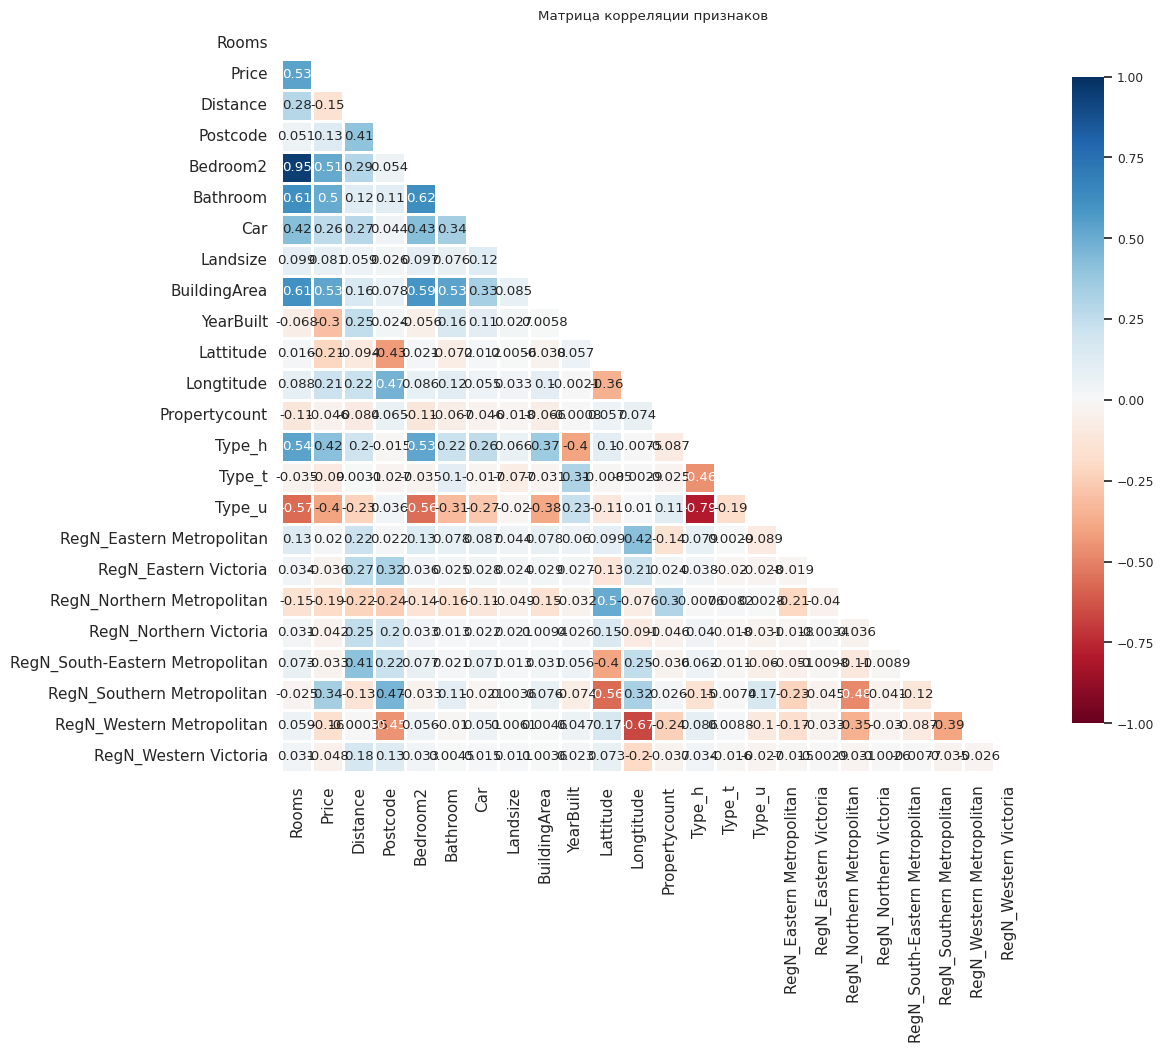

In [20]:
import matplotlib.pyplot as plt
sns.set(style="white")# цвет фона

# построить "маску" для отображения только половины корреляционной матрицы
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=0.8) # размер шрифта

# Построить тепловую карту
sns.heatmap(
            ##################
            data=corr_df,   ### <<<- объект-матрица корреляции 
            ##################
            vmin=-1, vmax=1, center=0,
            annot=True, 
            cmap = 'RdBu',
            mask=mask,   # применить маску
            square=True, # форма ячейки - квадрат
            linewidths=1.0, # зазор между ячейки
            cbar_kws={"shrink": .7}  # уменьшить размер легенды
           )
plt.title(u'Матрица корреляции признаков');


In [21]:
# Последовательное применение операции: 
# - получить единственный столбец, 
# - получить абсолютные значения, 
# - отсортировать
corr_df[['Price']].abs().sort_values(by="Price")

,Price
RegN_Eastern Metropolitan,0.019592
RegN_South-Eastern Metropolitan,0.033041
RegN_Eastern Victoria,0.036061
RegN_Northern Victoria,0.042056
Propertycount,0.046410
RegN_Western Victoria,0.047775
Landsize,0.081419
Type_t,0.089724
Postcode,0.125539
Distance,0.148867


В качестве целевой переменной выберем признак:
- **'Price'** - Стоимость.


В качестве независимых переменных выберем признаки с высоким абс. значением коэфф. корреляции, но при этом как можно более не связанные  между собой. Кандидаты: 
  * **'YearBuilt'** - Год постройки
  * **'Landsize'**-  Размер участка
  * **'Rooms'** - Кол-во комнат
  * **'BuildingArea'** - Площадь
  * **'Type_h'** - Тип недвижимости h - house,cottage,villa, semi,terrace;
  * **'RegN_Southern Metropolitan'** - Район
  
  

Составим списко исходный и целевой переменных

In [22]:
features = ['Rooms', 'YearBuilt', 'Landsize',  'Type_h', ]
target   = ['Price']

# Просмотр характеристик выбранных признаков

<font color='red'> Все последующие действия производятся над таблицей <b>df_digPlus </b></font>


<Figure size 700x700 with 0 Axes>

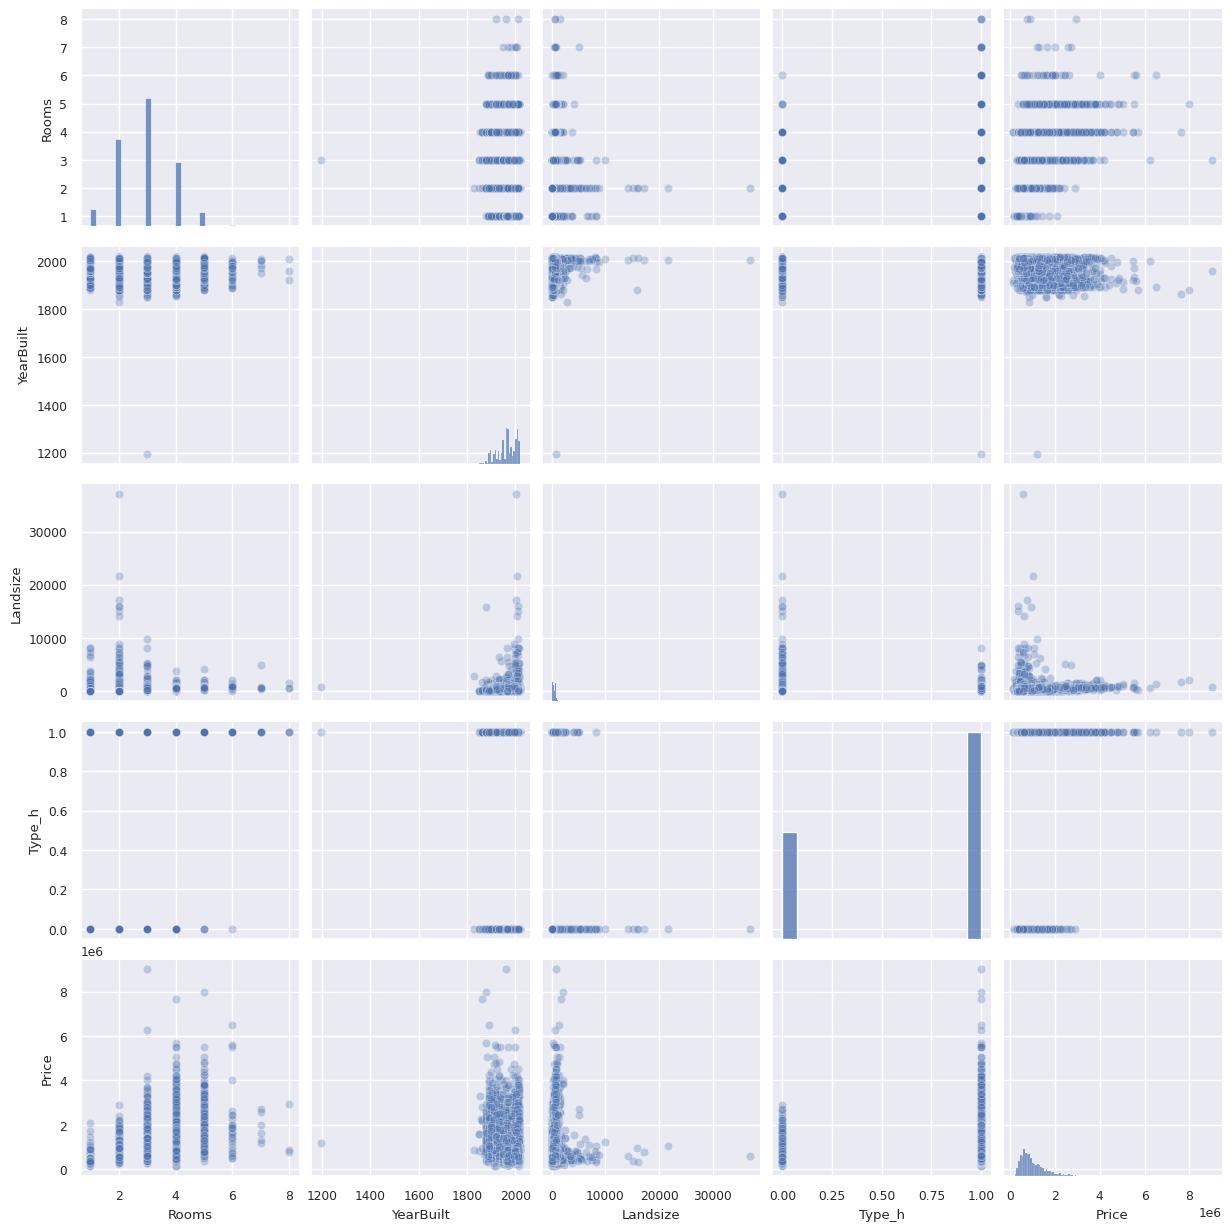

In [23]:
# График признаков попарно
plt.figure(figsize=(7,7))
%config InlineBackend.figure_format = 'png' # формат изображений PNG, для сокращения времени отрисовки графиков

sns.pairplot(
    df_digPlus[features + target], 
    #hue = 'Type',         # Признак разделения
    kind="scatter",        # Тип даграмм: reg,scatter 
    diag_kind = 'hist',     # Тип диагоральных даграмм: hist, kde
    plot_kws={'alpha':0.3} # прозрачность точек
); 

## Поиск и обработка выбросов

<font color='red'> Все последующие действия производятся над таблицей <b>df_digPlus </b></font>


Судя по виду графиков рассеяния в "пустых областях" присутствуют малое кол-во объектов, т.е. в выборе присутствуют аномально малые или большие значения - "выбросы". Для их обработки проведем следующие операции.

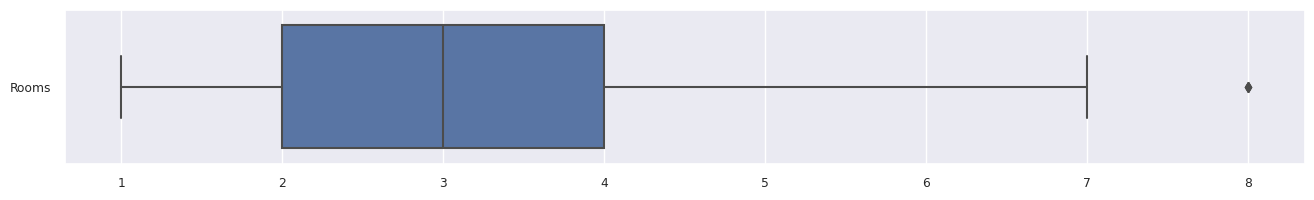

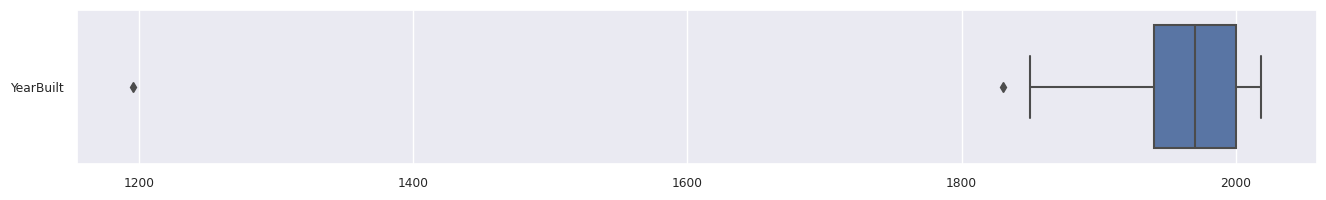

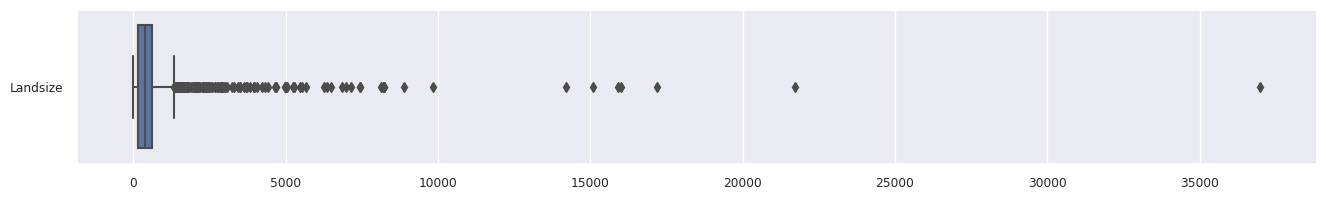

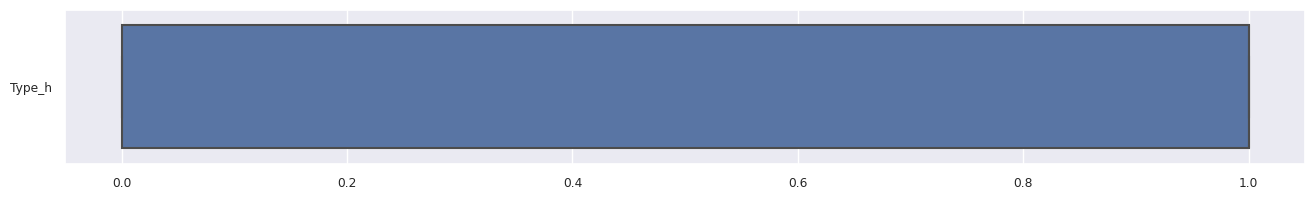

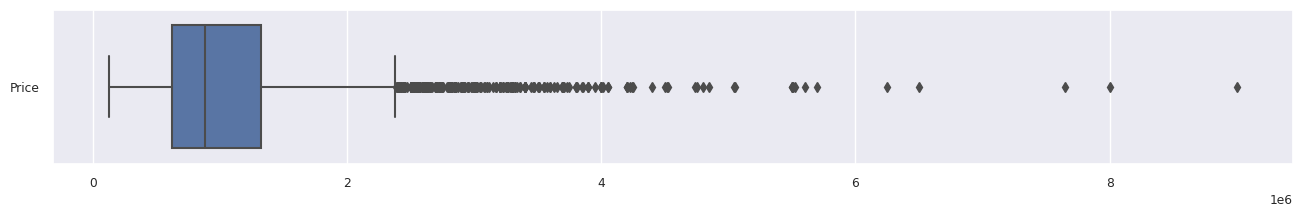

In [24]:
# Цикл: для каждого элемента в объединенном списке
for feature_name in (features+target):
    
    # Построить полотно для рисования с указанным размером
    plt.figure(figsize=(16,2))
    
    # На созданном полотне отрисовать boxplot
    sns.boxplot( data=df_digPlus[[feature_name]], # данные
                 orient='h' # ориентация графика
               )

Установим границы значений, для тех объектов таблицы, которые должны остаться

In [25]:
# создадим "словарь"/"хэш-таблицу" для удобного обращения, где ключ - это название признака
tressholdDict = { 
    'Rooms'     : (1,7)            , # кол-во комнат
    'YearBuilt' : (1850, 2020)     , # год постройки
    'Landsize'  : (0, 1300)        , # размер участка
    'Price'     : (0, 2.1 * 10**6) , # цена
}

print (tressholdDict)

{'Rooms': (1, 7), 'YearBuilt': (1850, 2020), 'Landsize': (0, 1300), 'Price': (0, 2100000.0)}


Проверим, какая часть данных выходит за пределы границ значений


In [26]:
# Цикл: для каждого элемента в словаре/хэш-таблице пройтись по ключам - названиям признаков
for feature_name  in tressholdDict:
    threesMin =  tressholdDict[feature_name][0] # извлечь нижнее пороговое
    tresshMax =  tressholdDict[feature_name][1] # извлечь верхнее пороговое

    # Получить кол-во эл. вне пороговых значений. Прием - фильтрация
    over_count = len(  df_digPlus[ 
                            ~(df_digPlus[feature_name] >= threesMin ) & (df_digPlus[feature_name] <= tresshMax) # фильтр по двум границам. ~ инверсия логических значений
                          ] 
                    )
    
    dcount = df_digPlus[feature_name].count() # кол-во эл. общее
    
    print ('''{}. Принимаем пороговые значение равными {}.
  Кол-во эл. вне пороговых - {} из {} значение(ий) ({:.1%})\n'''.format( 
        feature_name, 
        tressholdDict[feature_name],
        over_count,
        dcount,
        over_count/ dcount,
    ))

Rooms. Принимаем пороговые значение равными (1, 7).
  Кол-во эл. вне пороговых - 0 из 6196 значение(ий) (0.0%)

YearBuilt. Принимаем пороговые значение равными (1850, 2020).
  Кол-во эл. вне пороговых - 2 из 6196 значение(ий) (0.0%)

Landsize. Принимаем пороговые значение равными (0, 1300).
  Кол-во эл. вне пороговых - 0 из 6196 значение(ий) (0.0%)

Price. Принимаем пороговые значение равными (0, 2100000.0).
  Кол-во эл. вне пороговых - 0 из 6196 значение(ий) (0.0%)



Отфильтруем значения которые находятся вне пороговых.

In [27]:
# Во избежание путаницы создадим для полседующих операций копию исходного объетка
df_digPlusFiltred = df_digPlus.copy()

for feature_name  in tressholdDict:
    threesMin =  tressholdDict[feature_name][0]
    tresshMax =  tressholdDict[feature_name][1]
    
    
    # фильтр по двум границам. Оператор "~" -инверсия логических значений
    df_digPlusFiltred = df_digPlusFiltred[ 
        (df_digPlusFiltred[feature_name] >= threesMin ) & (df_digPlusFiltred[feature_name] <= tresshMax) 
        ]
    print("Обработан ", feature_name )
    
    
print ("Отброшено {} строк. Осталось {} строк.".format(
    len(df_digPlus)  - len(df_digPlusFiltred),
    len(df_digPlusFiltred))
)

Обработан  Rooms
Обработан  YearBuilt
Обработан  Landsize
Обработан  Price
Отброшено 572 строк. Осталось 5624 строк.


Rooms 1 7
YearBuilt 1850.0 2018.0
Landsize 0.0 1290.0
Type_h 0 1
Price 131000.0 2100000.0


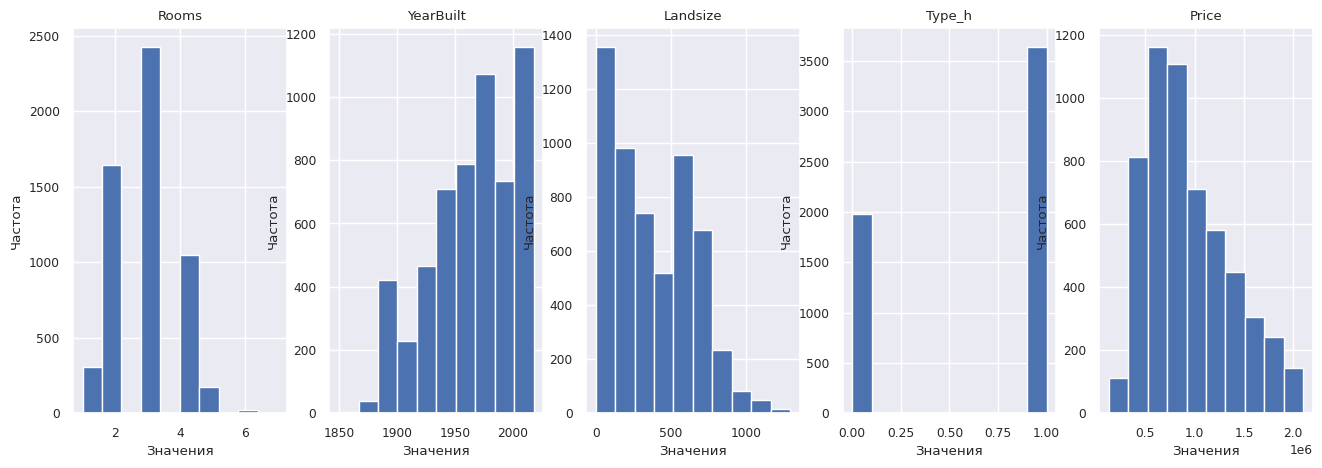

In [28]:
# Строим гистограммы по каждому признаку: 
# data[features].hist() #Упрощенный вывод графиков

plt.figure(figsize=(16, 5))
plot_number = 0

for feature_name in (features+target):
    plot_number += 1
    
    plt.subplot(1, len(features+target), plot_number)
    
    plt.hist(df_digPlusFiltred[feature_name]) # Построение гистрограммы
    
    plt.title(feature_name)
    plt.xlabel(u'Значения')
    plt.ylabel(u'Частота')
    print (feature_name, 
           df_digPlusFiltred[feature_name].min(),
           df_digPlusFiltred[feature_name].max())

## Сохранение данных

<font color='red'> Все последующие действия производятся над таблицей <b>df_digPlusFiltred </b></font>


In [29]:
df_digPlusFiltred.to_csv('./melbourne_data_PREPARED.csv', # путь для сохранения
            index=False, # запрет сохранения "индексов" (тек. номеров строк)
           )

## Формирование тренировочной и проверочной выборок

<font color='red'> Все последующие действия производятся над таблицей <b>df_digPlusFiltred </b></font>


Для обучения и проверки качеста модели применяют прием заключающийся в разделении исходной выборки на части:
* Обучающую (Train) - данные, на которых модель формирует коэффициенты
* Проверочную (Test) - данные, которые предявляют обученой модели для получения и сравнения вычисленных(Predicted) значений. 

Для разделения воспользуемся функцией __train_test_split__ из пакета __sklearn__

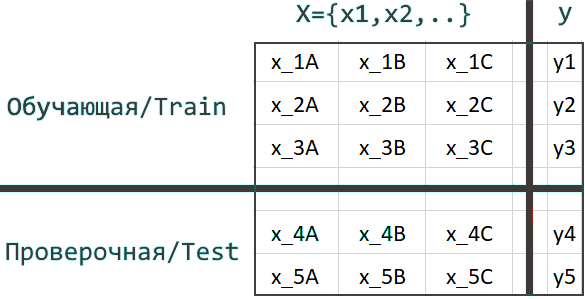

In [30]:
valid_size = 0.3 # доля тестовой части в выборке
rand_seed = 8 # начальное состояние генератора случ. чисел

x_train, x_test, y_train, y_test =  train_test_split(
    df_digPlusFiltred[features],    # исходные данные X
    df_digPlusFiltred[target],      # исходные данные y
    
    test_size = valid_size, # доля тестовой части в выборке
    random_state=rand_seed, # начальное состояние генератора случ. чисел
    shuffle=True            # перемешивание
) 

In [31]:
print ("Кол-во элементов: \n  x_train: {}, y_train {} \n  x_test:  {}, y_test  {} \n  total x: {}, total y {} ".format  (
    len(x_train), len(y_train),
    len(x_test),  len(x_test), 
    len(x_train)+len(x_test), len(y_train)+len(x_test),
))

Кол-во элементов: 
  x_train: 3936, y_train 3936 
  x_test:  1688, y_test  1688 
  total x: 5624, total y 5624 


Проверим содержимое обучающей и проверочной частей

In [32]:
x_test[:3]

,Rooms,YearBuilt,Landsize,Type_h
2949,3,1950.0,657.0,1
860,2,2005.0,201.0,1
7597,2,1970.0,638.0,0


In [33]:
y_test[:3]

,Price
2949,660000.0
860,722000.0
7597,320000.0


# Построение модели

<font color='red'> Все последующие действия производятся над таблицами <b>x_train, x_test, y_train, y_test </b></font>


## Одномерная модель от признака 'YearBuilt'

Для получения линейной регрессионной модели созданим экземпляр класс 
__sklearn.linear_model.LinearRegression()__

In [34]:
lr = linear_model.LinearRegression()

Полученная модель требует процедуры обучения - подбора значений коэфф. для минимизации отличий между вычисленными значениями и предоставленными целевыми (обучающими y). У большинства моделей доступен метод __.fit( x_train,y_train)__

In [35]:
# Вычислить коэфф. Ki в функции y(x)=Ki*xi + .... + B
# на тренировочном наборе, т.е. обучить модель
lin_model_YearBuilt = lr.fit(
    x_train[['YearBuilt']], 
    y_train[['Price']]
)

# Получить вычисленные(predicted) зн. на проверочном наборе
# y_pred = fittedModel.predict(x_test)
y_pred_PriceYearBuilt  = lin_model_YearBuilt.predict(x_test[['YearBuilt']])

Для наглядности построим график рассеяния (он же график разброса, точечный, scatter)

InvalidIndexError: (slice(None, None, None), None)

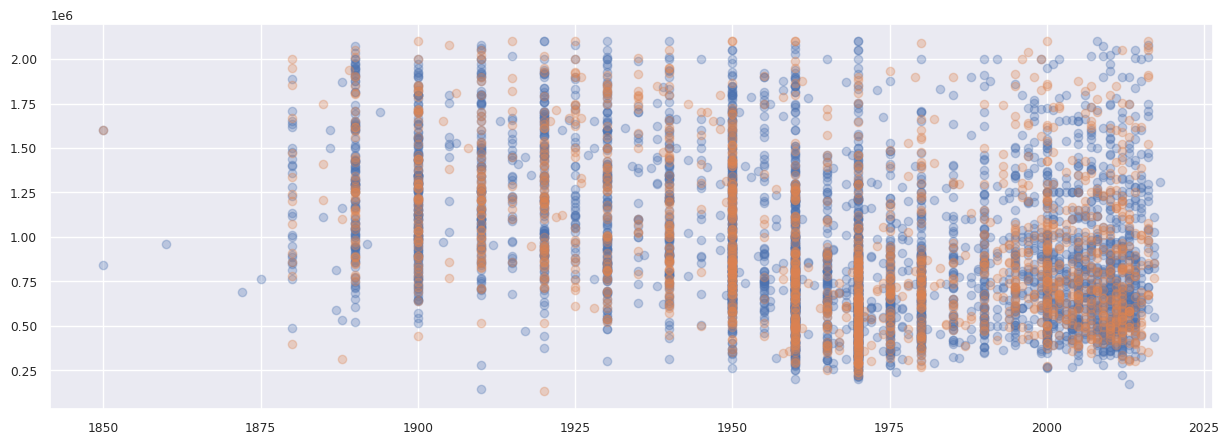

In [36]:
# Создать полотно для рисования с указаными размерами
plt.figure(figsize=(15,5))

# Нанести график рассеяния - plt.scatter
plt.scatter(x_train[['YearBuilt']],  y_train[['Price']], alpha=0.3, label='Тренировочный') # тренировочный
plt.scatter(x_test[['YearBuilt']],   y_test[['Price']],  alpha=0.3, label='Проверочный')   # проверочный

# Нанести график - линии через точки - plt.plot
label_str = "y_pred (x) = x * {:.0f} + {:.0f}".format(lin_model_YearBuilt.coef_[0][0], lin_model_YearBuilt.intercept_[0])

plt.plot( x_test[['YearBuilt']], y_pred_PriceYearBuilt,
            lw=2, color='red', label=label_str)

plt.legend(loc="best")  # положение легенды
plt.xlabel('YearBuilt') # подпись осей
plt.ylabel(target[0])   # подпись осей
plt.title(u'График разброса'); # Заголовок

Т.к. модель является линейной имеются некоторые расхождения между реальными и вычисленными значениями - "ошибки". Для оценки точности построим гистограмму распределения ошибок

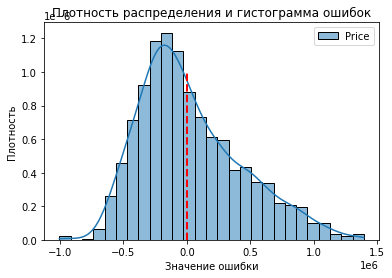

In [ ]:
plt.figure(figsize=(6,4))

# Гистограмма и Плотность распределения - sns.distplot
# data = y_true - y_pred
#sns.distplot(y_test[['Price']]- y_pred_PriceYearBuilt)
sns.histplot(y_test[['Price']]- y_pred_PriceYearBuilt, 
             color="red", 
             kde=True, # оценка плотности в виде кривой
             stat="density",# density: общая площадь равна 1
            )

# Осевая линия
plt.plot(
    [0, 0],
    [0, 10 * pow(10,-7)], '--', lw=2, c='r')

plt.ylabel(u'Плотность')
plt.xlabel(u'Значение ошибки')
plt.title(u'Плотность распределения и гистограмма ошибок');
plt.show()

Построим еще пару графиков для визуальной оценки качества модели

Text(0, 0.5, 'Абсолютная ошибка')

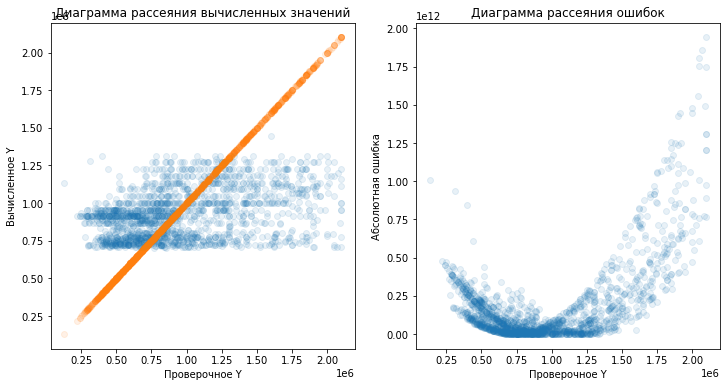

In [ ]:
plt.figure(figsize=(12,6))

# создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс в сетке
plt.subplot(121)
plt.scatter(y_test[['Price']], y_pred_PriceYearBuilt,  alpha=0.1)
plt.scatter(y_test[['Price']], y_test[['Price']],  alpha=0.1)
plt.title('Диаграмма рассеяния вычисленных значений');
plt.xlabel('Проверочное Y')
plt.ylabel('Вычисленное Y')

# создать первое полотно 121: 1-строк, 2-столбцов, 2-индекс в сетке
plt.subplot(122)
plt.scatter(y_test[['Price']], (y_test[['Price']] - y_pred_PriceYearBuilt)**2,  alpha=0.1)

plt.title('Диаграмма рассеяния ошибок')
plt.xlabel('Проверочное Y')
plt.ylabel('Абсолютная ошибка')


С помощью функций __sklearn.metrics.*__ сравним реальные и вычисленные значениямя и получим важные оценки качества модели

In [ ]:
print ("Линейная одномерная регрессия. Признак 'YearBuilt'.")
print ("y_pred_PriceYearBuilt (x) = x * {} + {}\n".format(
    lin_model_YearBuilt.coef_, lin_model_YearBuilt.intercept_))

r2_LinRegr_YearBuilt   = metrics.r2_score                   (y_test[['Price']], y_pred_PriceYearBuilt)
mae_LinRegr_YearBuilt  = metrics.mean_absolute_error        (y_test[['Price']], y_pred_PriceYearBuilt)
rmse_LinRegr_YearBuilt = np.sqrt( metrics.mean_squared_error(y_test[['Price']], y_pred_PriceYearBuilt))


print ("R2 - коэфф. детерминации:        {:>7,.3f}".format               ( r2_LinRegr_YearBuilt ))
print ("MAE - средняя абсолютная ошибка: {:>7,.3f}".format               ( mae_LinRegr_YearBuilt ))
print ("RMSE - кв. корень из среднеквадратичной ошибки: {:>7,.3f}".format( rmse_LinRegr_YearBuilt ))

Линейная одномерная регрессия. Признак 'YearBuilt'.
y_pred_PriceYearBuilt (x) = x * [[-4468.01507776]] + [9714290.29405879]

R2 - коэфф. детерминации:          0.126
MAE - средняя абсолютная ошибка: 320,384.079
RMSE - кв. корень из среднеквадратичной ошибки: 405,142.099


## Многомерная модель от  НАБОРА#1 переменных (пример: x1, x2, x3, ...) 

In [ ]:
# ваш код

#lr_x1x2x3 = linear_model.LinearRegression()

# Вычислить коэфф. на тренировочном наборе, т.е. обучить модель
#lin_model_x1x2x3 = lr_x1x2x3.fit(
#    x_train[['YearBuilt', 'Type_h', 'Rooms']], 
#    y_train[['Price']]
#)

# Получить вычисленные(predicted) зн. на проверочном наборе
#y_pred = fittedModel.predict(x_test)
#y_pred_x1x2x3  = lin_model_x1x2x3.predict(x_test[['YearBuilt', 'Type_h', 'Rooms']])

#...

## Многомерная модель от  НАБОРА#2 переменных (пример: x5, x6, x7, ...) 

In [ ]:
# ваш код

# Итоги. Сравнение полученных моделей

Размеры таблицы
- исходная таблица = Строк x Столбцов
- после искл пропущенных значений = Строк x Столбцов
- после искл выбросов = Строк x Столбцов


In [ ]:
import pandas as pd

ddf = pd.DataFrame (
    {
        "Признак": ["Rooms", "x1, x2, x3", "x5, x6, x7"],
        "K":       [367971,     0,     0], 
        "B":       [-10648,     0,     0],
        "MAE":     [378183,     0,     0],
        "RMSE":    [530178,     0,     0],
        "R2":      [0.308,      0,     0],
    }
 )
ddf

,Признак,K,B,MAE,RMSE,R2
0,Rooms,367971,-10648,378183,530178,0.308
1,"x1, x2, x3",0,0,0,0,0.000
2,"x5, x6, x7",0,0,0,0,0.000


# Выводы по работе

...

...

...